In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
import math
import random
from random import uniform
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# Exercise 1 : Binary classification using logistic regression

## Load data and inspection of the data

In [26]:
# We will load the data that is in the file 'donnees_exo1.txt'
data = pd.read_csv('donnees_exo1.txt', sep = ' ')

In [27]:
data

,X1,X2,Y
0,-0.697580,0.684940,0
1,-0.478690,0.633770,1
2,0.057028,0.918860,0
3,-0.593890,0.494880,0
4,0.229840,-0.411550,1
...,...,...,...
113,0.460250,0.012427,1
114,-0.046659,0.816520,1
115,0.322000,0.692250,1
116,-0.524770,0.209800,1


Questions : 
1. How many examples are available in this dataset ? 
2. How many features ? 
3. What is the distribution of the target variable ?

*Hint : value_counts can help for the last question*

1. How many examples are available in this dataset ? 

In [28]:
print("Number of examples in the dataset:", data.shape[0])

Number of examples in the dataset: 118


2. How many features ? 

In [29]:
print("Number of feartures in the dataset:", data.shape[1] - 1)  # Subtracting 1 for the label column

Number of feartures in the dataset: 2


3. What is the distribution of the target variable ?

In [30]:
# To get the distribution of the target variable in your dataset, 
# use the value_counts() function on the target column. 
# For example, if your target column is named Y:

print(data['Y'].value_counts()) # how many times each class appears

Y
0    60
1    58
Name: count, dtype: int64


Exercise: Plot on the same graph this dataset with different colors depending on the class value.

X1 should be on the x-axis, X2 on the y-axis and the points colored depending on the class value (0 or 1)

*Hints:* 
- *You can use scatter function for the plot*
- *There are different possibilities for the colors: you can create two sets (one with class 0 and one with class 1) or use colorMaps (look at the documentation)* 

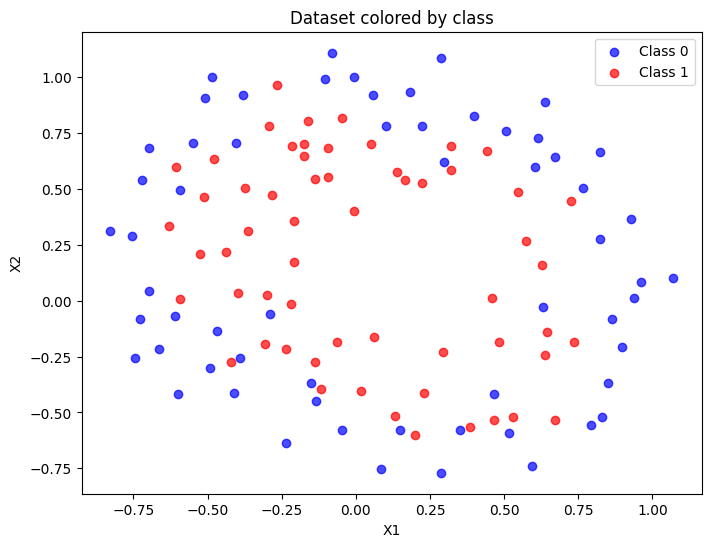

In [31]:
# Plot X1 vs X2, colored by class (Y)
plt.figure(figsize=(8,6))
# Rendering each point in the plot with a different color
for label, color in zip([0, 1], ['blue', 'red']):
    subset = data[data['Y'] == label]
    plt.scatter(subset['X1'], subset['X2'], c=color, label=f'Class {label}', alpha=0.7)
# Labeling the axes and adding a legend
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Dataset colored by class')
plt.show()

## Train / Validation / Test split

Exercise : Split the dataset into 3 sets : train (70%), validation (15%) and test (15%).

*Hint : you can use the 'train_test_split' function that splits a set in 2 sets with a proportion that you can give as parameter. To split into 3 sets, you'll need to use it twice (be careful about the proportions)*

In [32]:
# First split: train (70%) and temp (30%) "temporary set for validation and test"
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42, stratify=data['Y'])

# Second split: validation (15%) and test (15%) from temp (which is 30% of the data)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42, stratify=temp_data['Y'])

# Check the sizes
print("Total dataset size:", len(data))
print("Train size:", len(train_data))
print("Validation size:", len(val_data))
print("Test size:", len(test_data))

Total dataset size: 118
Train size: 82
Validation size: 18
Test size: 18


Exercise : Plot on the same graph the train and validation data with different colors for the class values and different markers between train and validation set.

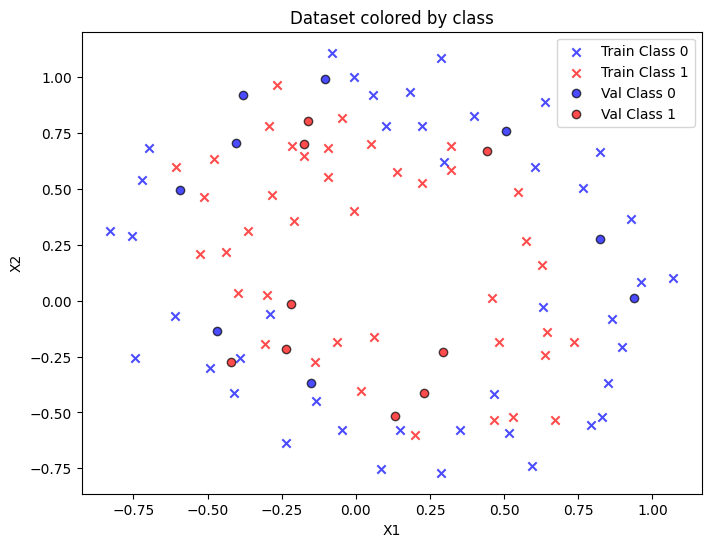

In [33]:
plt.figure(figsize=(8,6))
markers = {'train': 'x', 'val': 'o'}
colors = {0: 'blue', 1: 'red'}

# Plot train data
for label in [0, 1]:
    subset = train_data[train_data['Y'] == label]
    plt.scatter(subset['X1'], subset['X2'], c=colors[label], marker=markers['train'], label=f'Train Class {label}', alpha=0.7)

# Plot validation data
for label in [0, 1]:
    subset = val_data[val_data['Y'] == label]
    plt.scatter(subset['X1'], subset['X2'], c=colors[label], marker=markers['val'], label=f'Val Class {label}', alpha=0.7, edgecolor='k')

# Labeling the axes and adding a legend
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Dataset colored by class')
plt.show()


## Fitting a logistic regression model

We will now fit a logistic regression model to the training set.
For this, we can use the command on the next cell:

In [34]:
lr_model = LogisticRegression().fit(train_data.iloc[:,0:2], train_data.Y)
# Parameters can be added to the 'LogisticRegression' call (we will see this later when we'll need)
# 2 parameters are given to the 'fit' function : 
#  - a dataset containing the features of the examples (here X1 and X2, the 2 first columns of the training set)
#  - a vector containing the labels (Y) of the examples (in the same order), 0 or 1 here

Question : How many parameters should have this model ?

For a binary logistic regression model with two features (X1, X2):

Each feature has one parameter (weight).
There is one intercept (bias term).
So, the total number of parameters is:

2 (features) + 1 (intercept) = 3 parameters

The constant of the model (theta_0 in the slides) can be obtained by the command:

In [35]:
lr_model.intercept_

array([-0.04103162])

The parameters associated to each feature can be obtained by the command:

In [36]:
lr_model.coef_

array([[-0.47013621,  0.319003  ]])

Using the values of the features for the first example of the training set (row 0) and the values of the parameters of the model above, calculate the output that the model should give (using the equation of the logistic regression model).

*Hint : exponential can be obtained with math.exp()*

In [49]:
# Get the feature values for the first example (row 0)
x1 = train_data.iloc[0, 0]
x2 = train_data.iloc[0, 1]

# Get the values of the model parameters
intercept = lr_model.intercept_[0]
w1 = lr_model.coef_[0, 0]
w2 = lr_model.coef_[0, 1]

# The equation of the logistic regression model for two features (X1, X2) is the linear combination:
z = intercept + w1 * x1 + w2 * x2

# Sigmoid function to get the probability (probability = 1 / (1 + exp(-z))
p = 1 / (1 + math.exp(-z))

What shoud be the decision made by this model for this example ?

In [52]:
print (f"The model predicts a probability of {p:.4f} for the first training example to belong to class 1.")
print (f"The model predict a probability of {1-p:.4f} for the first training example to belong to class 0.\n")

if(p >= 0.5):
    print("The model predicts that the first training example belongs to class 1.")
else:
    print("The model predicts that the first training example belongs to class 0.")

The model predicts a probability of 0.5697 for the first training example to belong to class 1.
The model predict a probability of 0.4303 for the first training example to belong to class 0.

The model predicts that the first training example belongs to class 1.


It is possible to obtain automatically this value by the command:

In [37]:
lr_model.predict_proba(train_data.iloc[0:1,0:2])
# actually this command gives you the two probabilities : P(Y = 0 | X1, X2) and P(Y = 1 | X1, X2)
# You should obtain the same probability than the one calculated above

array([[0.43027788, 0.56972212]])

In [38]:
# The final decision of the model can be obtained by the command:
lr_model.predict(train_data.iloc[0:1,0:2])

array([1])

Question : Does this model make a good decision for this example ?

In [ ]:
# To compare the model's predicted class for the first training example with its true label:
predicted = lr_model.predict(train_data.iloc[0:1,0:2])[0]
true = train_data.iloc[0]['Y']

print(f"Predicted class: {predicted}") 
print(f"True class: {true}")

if predicted == true:
    print("The model's prediction is correct.")
else:
    print("The model's prediction is incorrect.")


Predicted class: 1
True class: 0.0
The model's prediction is correct.


The accuracy of a classifier on a dataset (percentage of good prediction made for all the examples of the dataset) can be obtained automatically by the function 'score' applied to a classifier.
It needs two 2 parameters : 
 - a dataset containing the examples that we want to predict (their features)
 - the real class of these examples.
 Below, you will see how to compute the accuracy of the model 'lr_model' on the training set

In [39]:
lr_model.score(train_data.iloc[:,0:2], train_data.Y)

0.5609756097560976

Exercise : Compute the accuracy of this model on the validation set 

In [58]:
accuracy_val = lr_model.score(val_data.iloc[:,0:2], val_data.Y)
print(f"Validation accuracy: {accuracy_val:.4f}")

Validation accuracy: 0.5000


## Visualization of the decision boundary

The function below allows you to see the decision boundary of a logisic regression model.
There are 7 parameters : 
 - model : a logistic regression model already fitted
 - data : the data points that you want to draw together with the boundary (training set for instance)
 - deg : the degree of the polynomial features used in the model (1 if it is a classical model). These polynomial features will be discussed later
 - xmin, xmax, ymin, ymax : the min and max coordinates that you want to be displayed (depends on the data)

An example of the use of this function is given after. 

In [40]:
def draw_boundary(model, data, deg, xmin, xmax, ymin, ymax):
    h = 0.05

    # create a grid of points from xmin to xmax and from ymin to ymax with a step h
    xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))

    zz = np.c_[xx.ravel(), yy.ravel()] # create a matrix containing the grid points
    zz = pd.DataFrame(zz) # convert it to a dataframe to be able to use it with the model
    
    # adjust the points to the desired degree
    if(deg>1):
        poly = PolynomialFeatures(degree = deg)
        zz2 = poly.fit_transform(zz)
        zz2 = pd.DataFrame(zz2)
    else:
        zz2 = zz

    # predict the class of each point of the grid
    pred_zz= pd.Series(model.predict(zz2))

    color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))
    fig = plt.figure(figsize=(8,8))

    # plot a grid of points to show where the decision boundary is
    fig = plt.scatter(zz.iloc[:,0], zz.iloc[:,1], c = pred_zz, cmap = color_map, marker='+')

    # plot the dataset points
    fig = plt.scatter(data.iloc[:,0], data.iloc[:,1], s = 50, c = data.iloc[:,2], cmap = color_map)

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision boundary of degree ' + str(deg))
    plt.show()
    

/Users/joseantonioruizheredia/Code/Python/MachineLearningLabs/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


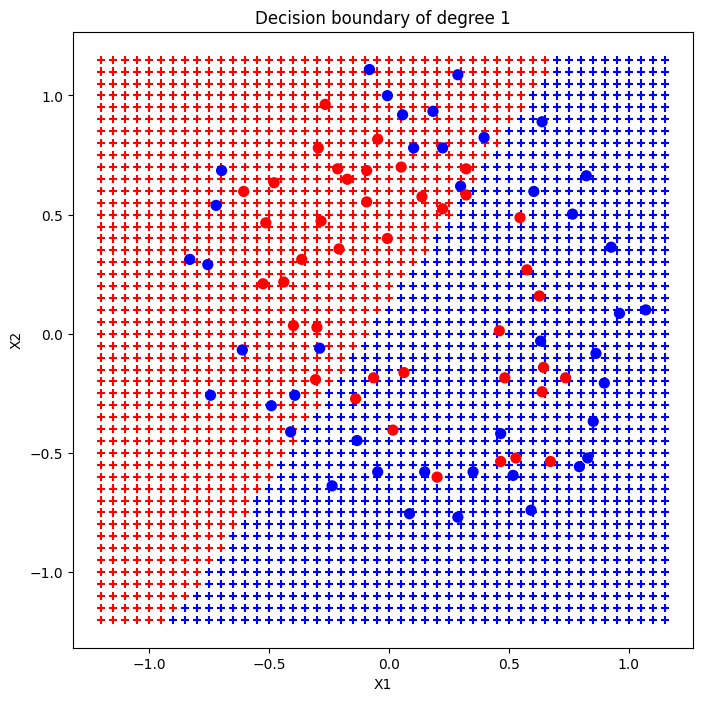

In [41]:
draw_boundary(lr_model, train_data, 1, -1.2, 1.2, -1.2, 1.2)

Questions : 
1. What is the type of this decision boundary ? 
2. Was it expected ? 
3. Does it seem adapted to this dataset ?

1. What is the type of this decision boundary ? 

It is a Linear Decision Boundary because it is a straight line that demarcates one feature space class from another.

2. Was it expected?

Yes, this is expected because a standard logistic regression with two features produces a linear decision boundary.

3. Does it seem adapted to this dataset?

The data is not linearly separable, in other words the classes are mixed in a non-linear way, then a linear boundary may not be sufficient, and a more complex model (e.g., with polynomial features) would be better.

We will now see how to add polynomial features to the dataset before fitting a linear regression model:

In [ ]:
poly = PolynomialFeatures(degree = 2) # Here we create an object that will be used to add polynomial features.
# The degree of the features can be modified in the parameters
X_train2 = poly.fit_transform(train_data.iloc[:,0:2]) # Here we use the 'poly' created above to add polynomial
# features of degree 2 to the training set
# It creates 4 new columns : 
# - one with 'ones' everywhere
# - one with X1^2
# - one with X2^2
# - one with X1*X2


Question : Check the dimensions of the new training set created above

In [60]:
X_train2.shape

(82, 6)

Now we can fit a new logistic regression model using the new training set:

In [43]:
lr_model2 = LogisticRegression().fit(X_train2, train_data.Y)

Question : Compute the prediction accuracy of this new model on the training set. Is it better than the first model ? 

In [ ]:
accuracy_new_model = lr_model2.score(X_train2, train_data.Y)

print(f"Accuracy of new model on train data: {accuracy_new_model:.4f}")

Accuracy of new model on train data: 0.7927


Exercise : Look at the decision boundary of this new model, using the 'draw_boundary' function. You will need to set the 'deg' parameter to 2

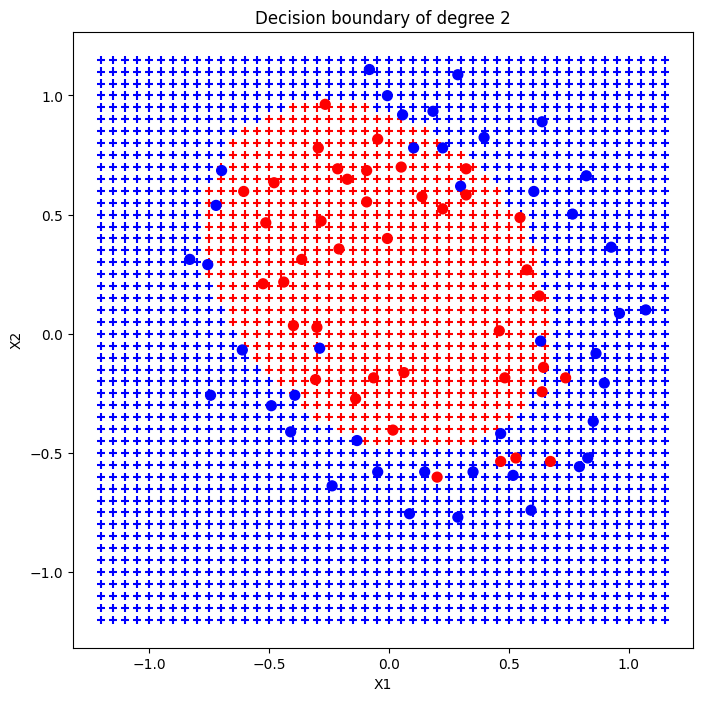

In [66]:
draw_boundary(lr_model2, train_data, 2, -1.2, 1.2, -1.2, 1.2)

Exercise : Compute the prediction accuracy of this new model on the validation data

*Hint : You will first need to create a 'new' validation dataset by adding the same polynomial features to the original validation set*

In [ ]:
X_val2 = poly.fit_transform(val_data.iloc[:,0:2])
accuracy_val_new_model = lr_model2.score(X_val2, val_data.Y)

print(f"Accuracy of new model on validation data: {accuracy_val_new_model:.4f}")

Exercise : Try now to add higher degree polynomial features to the dataset, and apply the procedure explained during the CM to select the most adapted model. Estimate its generalization error

#  Exercice 2 : Multi-class classification

In this exercice, we will see how to apply logistic regression for multi-class classification (when the number of possible values for the target is more than 2)

In [44]:
# Load the data. 
segment = pd.read_csv("segment.csv", sep = ',')
segment

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,y
0,218,178,9,0.111111,0.0,0.833333,0.547722,1.111109,0.544331,59.629630,52.444443,75.222220,51.222220,-21.555555,46.777780,-25.222221,75.222220,0.318996,-2.040554,6
1,113,130,9,0.000000,0.0,0.277778,0.250924,0.333333,0.365148,0.888889,0.000000,2.555556,0.111111,-2.666667,5.000000,-2.333333,2.555556,1.000000,-2.123254,3
2,202,41,9,0.000000,0.0,0.944448,0.772202,1.111112,1.025597,123.037040,111.888885,139.777790,117.444440,-33.444443,50.222220,-16.777779,139.777790,0.199347,-2.299918,2
3,32,173,9,0.000000,0.0,1.722222,1.781593,9.000000,6.749488,43.592594,39.555557,52.888890,38.333336,-12.111111,27.888890,-15.777778,52.888890,0.266914,-1.998857,6
4,61,197,9,0.000000,0.0,1.444444,1.515353,2.611111,1.925463,49.592594,44.222220,61.555557,43.000000,-16.111110,35.888890,-19.777779,61.555557,0.302925,-2.022274,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,30,102,9,0.000000,0.0,1.222222,0.118518,1.333333,0.800000,20.259260,20.333334,25.000000,15.444445,0.222222,14.222222,-14.444445,25.000000,0.381059,-1.555097,1
2306,143,24,9,0.000000,0.0,1.277777,0.907406,0.888888,1.140749,127.629630,117.666664,141.666670,123.555560,-29.888890,42.111110,-12.222222,141.666670,0.169397,-2.349252,2
2307,80,72,9,0.000000,0.0,1.222223,1.003697,1.444444,1.167461,59.000000,51.333332,74.444440,51.222220,-23.000000,46.333332,-23.333334,74.444440,0.314606,-2.090221,4
2308,98,133,9,0.000000,0.0,0.555555,0.172133,0.388889,0.327731,0.962963,0.000000,2.777778,0.111111,-2.888889,5.444445,-2.555556,2.777778,1.000000,-2.123254,3


Questions : 
1. How many features are there in this dataset ? 
2. How many examples ? 
3. What is the distribution of the target values ? 

*Hint: You can find some informations about this dataset on the file segment.dat*

In [45]:
# It is adviced to "standardize" the features before applying a logistic regression model. Santardize means
# transforming each feature so that the mean of each feature is 0 and the standard deviation 1.
# This can be done by the following commands
X_segment = segment.iloc[:,0:19] # X_segment contains the features
y_segment = segment.y # y_segment contains the class
scaler = preprocessing.StandardScaler().fit(X_segment) # Standard Scaler is the command to standardize
X_segment = scaler.transform(X_segment)
X_segment = pd.DataFrame(X_segment)
# Now the features are standardized inside the table X_segment
data_segment = X_segment
data_segment['y'] = y_segment
# data_segment contains the features (standardized) and the class (column 'y')

Exercise: Check (for 1 feature of your choice) whether its mean is 0 (you can use np.mean)

Exercise : Split the dataset into a train, a validation, and a test set

We will now fit a logistic regression model to the traning set. It is like in exercice 1, but we now need to specify that the problem is multi-class. For that, you need to use multi-class = 'multinomial' inside the call to LogisticRegression:

In [46]:
mc_model = LogisticRegression(multi_class='multinomial').fit(train_data.iloc[:,0:19], train_data.y)

AttributeError: 'DataFrame' object has no attribute 'y'

You should have a warning that says 'TOTAL NO. of ITERATIONS REACHED LIMIT'
It means that the parameters should not have been learned well beacuse the algorithm has reached the maximum number of iterations without converging. It is possible to increase the maximum number of iterations:

In [ ]:
mc_model = LogisticRegression(multi_class='multinomial', max_iter=1000).fit(train_data.iloc[:,0:19], train_data.y)
# Now it should converge

Question : How many parameters should have this model ?

Exercise : Check the number of parameters by looking at their values (same commands as exercice 1)

Questions : 

1. How many outputs should have this model ? Check the output values of the model for the first example of the training set using the function predict_proba (as in exercice 1). 

2. What should be the decision of the model here ? Check it with the 'predict' function

Questions : What is the prediction accuracy of this model on the train set ? and on the validation set ?

Exercise : Using the same procedure as in Exercice 1, try different polynomial features and select the best one. 
Then, estimate the generalization error of logistic regression on this dataset
Don't go over degree 5, otherwise it might be quite long to learn the model (a lot of features)